In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install xlrd==1.2.0

In [4]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# a. Tunjukkan analisa statistika deskriptif untuk variabel harga rumah (Column          Name: SalePrice)

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
import math

def range_data(data, kolom):
    return data[kolom].max() - data[kolom].min()

def penyebaran_data(data, kolom):
    range_ = range_data(data, kolom)
    variance_ = (data[kolom].std())**2
    stdev_ = data[kolom].std()
    Q3 = data[kolom].quantile(0.75)
    Q1 = data[kolom].quantile(0.25)
    IQR = Q3 - Q1
    print('Range dari ' + kolom + ' :', range_)
    print('Variance dari ' + kolom + ' :', variance_)
    print('Standard Deviation dari ' + kolom + ' :', stdev_)
    print('Inter Quartile Range dari ' + kolom + ' :', IQR)
    
def pemusatan_data(data):
    print('Modus dari' + ' ' + str(data) + ' :', df[data].mode()[0])
    print('Median dari' + ' ' + str(data) + ' :', df[data].median())
    print('Mean dari' + ' ' + str(data) + ' :', df[data].mean())

In [7]:
#analisa pemusatan data kolom SalePrice
pemusatan_data('SalePrice')

Modus dari SalePrice : 140000
Median dari SalePrice : 163000.0
Mean dari SalePrice : 180921.19589041095


In [8]:
#analisa penyebaran data
penyebaran_data(df, 'SalePrice')

Range dari SalePrice : 720100
Variance dari SalePrice : 6311111264.297451
Standard Deviation dari SalePrice : 79442.50288288663
Inter Quartile Range dari SalePrice : 84025.0


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

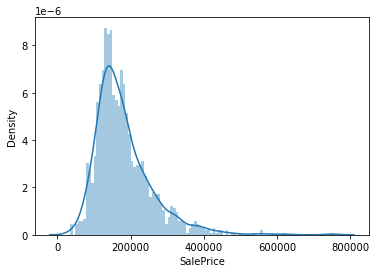

In [9]:
#Distribusi data
sns.distplot(df['SalePrice'], bins=100)

<AxesSubplot:xlabel='SalePrice'>

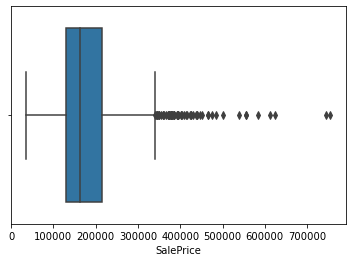

In [10]:
#Outlier
sns.boxplot(df['SalePrice'])

# b. Tunjukan analisis statistika deskriptif untuk variabel harga rumah (Column        Name: SalePrice) setiap tahunnya (Column Name: YrSold)

In [11]:
df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

### Tahun 2006

In [12]:
df1 = df[df['YrSold']==2006].reset_index()
df1

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
1,11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
2,17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
3,20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
4,28,29,20,RL,47.0,16321,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,207500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1430,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
310,1434,1435,20,RL,80.0,17400,Pave,NaN,Reg,Low,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,160000
311,1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
312,1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000


In [13]:
df1['SalePrice'].describe()

count       314.000000
mean     182549.458599
std       79426.838855
min       35311.000000
25%      131375.000000
50%      163995.000000
75%      218782.500000
max      625000.000000
Name: SalePrice, dtype: float64

In [14]:
import math
    
def pemusatan_data(data):
    print('Modus dari' + ' ' + str(data) + ' :', df1[data].mode()[0])
    print('Median dari' + ' ' + str(data) + ' :', df1[data].median())
    print('Mean dari' + ' ' + str(data) + ' :', df1[data].mean())

In [15]:
#analisa pemusatan data kolom SalePrice tahun 2006
pemusatan_data('SalePrice')

Modus dari SalePrice : 140000
Median dari SalePrice : 163995.0
Mean dari SalePrice : 182549.4585987261


In [16]:
#analisa penyebaran data tahun 2006
penyebaran_data(df1, 'SalePrice')

Range dari SalePrice : 589689
Variance dari SalePrice : 6308622730.498282
Standard Deviation dari SalePrice : 79426.83885500091
Inter Quartile Range dari SalePrice : 87407.5


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

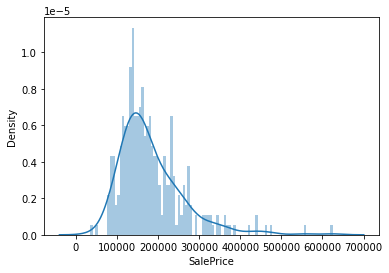

In [17]:
#Distribusi data
sns.distplot(df1['SalePrice'], bins=100)

<AxesSubplot:xlabel='SalePrice'>

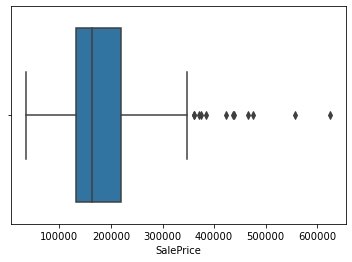

In [18]:
#Outlier
sns.boxplot(df1['SalePrice'])

### Tahun 2007

In [19]:
df2 = df[df['YrSold']==2007].reset_index()
df2

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
1,6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
2,13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
3,15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
4,21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,1444,1445,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,179600
325,1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
326,1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
327,1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000


In [20]:
df2['SalePrice'].describe()

count       329.000000
mean     186063.151976
std       85768.171410
min       39300.000000
25%      129900.000000
50%      167000.000000
75%      219500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [21]:
import math
    
def pemusatan_data(data):
    print('Modus dari' + ' ' + str(data) + ' :', df2[data].mode()[0])
    print('Median dari' + ' ' + str(data) + ' :', df2[data].median())
    print('Mean dari' + ' ' + str(data) + ' :', df2[data].mean())

In [22]:
#analisa pemusatan data kolom SalePrice tahun 2007
pemusatan_data('SalePrice')

Modus dari SalePrice : 129000
Median dari SalePrice : 167000.0
Mean dari SalePrice : 186063.1519756839


In [23]:
#analisa penyebaran data tahun 2007
penyebaran_data(df2, 'SalePrice')

Range dari SalePrice : 715700
Variance dari SalePrice : 7356179227.086592
Standard Deviation dari SalePrice : 85768.17141041653
Inter Quartile Range dari SalePrice : 89600.0


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

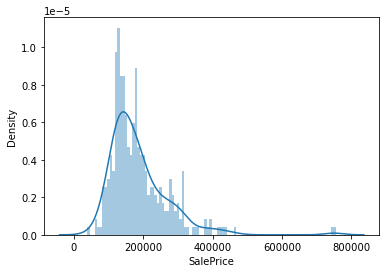

In [24]:
#Distribusi data
sns.distplot(df2['SalePrice'], bins=100)

<AxesSubplot:xlabel='SalePrice'>

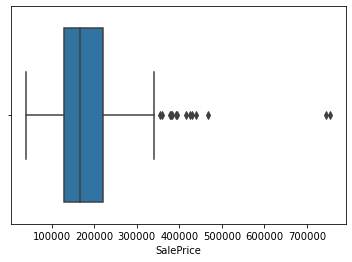

In [25]:
#Outlier
sns.boxplot(df2['SalePrice'])

### Tahun 2008

In [26]:
df3 = df[df['YrSold']==2008].reset_index()
df3

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
2,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
3,8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
4,9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,1435,1436,20,RL,80.0,8400,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,NaN,0,7,2008,COD,Abnorml,174000
300,1437,1438,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,394617
301,1440,1441,70,RL,79.0,11526,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,191000
302,1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300


In [27]:
df3['SalePrice'].describe()

count       304.000000
mean     177360.838816
std       69735.610685
min       40000.000000
25%      131250.000000
50%      164000.000000
75%      207000.000000
max      446261.000000
Name: SalePrice, dtype: float64

In [28]:
import math
    
def pemusatan_data(data):
    print('Modus dari' + ' ' + str(data) + ' :', df3[data].mode()[0])
    print('Median dari' + ' ' + str(data) + ' :', df3[data].median())
    print('Mean dari' + ' ' + str(data) + ' :', df3[data].mean())

In [29]:
#analisa pemusatan data kolom SalePrice tahun 2008
pemusatan_data('SalePrice')

Modus dari SalePrice : 140000
Median dari SalePrice : 164000.0
Mean dari SalePrice : 177360.83881578947


In [30]:
#analisa penyebaran data tahun 2008
penyebaran_data(df3, 'SalePrice')

Range dari SalePrice : 406261
Variance dari SalePrice : 4863055397.581193
Standard Deviation dari SalePrice : 69735.61068479427
Inter Quartile Range dari SalePrice : 75750.0


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

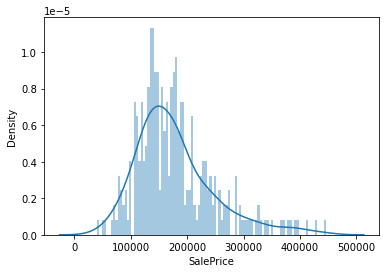

In [31]:
#Distribusi data
sns.distplot(df3['SalePrice'], bins=100)

<AxesSubplot:xlabel='SalePrice'>

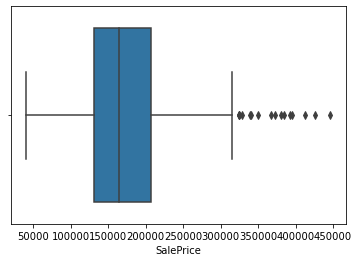

In [32]:
#Outlier
sns.boxplot(df3['SalePrice'])

### Tahun 2009

In [33]:
df4 = df[df['YrSold']==2009].reset_index()
df4

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
1,7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
2,19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
3,25,26,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300
4,36,37,20,RL,112.0,10859,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1442,1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
334,1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000
335,1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
336,1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090


In [34]:
df4['SalePrice'].describe()

count       338.000000
mean     179432.103550
std       80879.237311
min       34900.000000
25%      125250.000000
50%      162000.000000
75%      212750.000000
max      582933.000000
Name: SalePrice, dtype: float64

In [35]:
import math
    
def pemusatan_data(data):
    print('Modus dari' + ' ' + str(data) + ' :', df4[data].mode()[0])
    print('Median dari' + ' ' + str(data) + ' :', df4[data].median())
    print('Mean dari' + ' ' + str(data) + ' :', df4[data].mean())

In [36]:
#analisa pemusatan data kolom SalePrice tahun 2009
pemusatan_data('SalePrice')

Modus dari SalePrice : 110000
Median dari SalePrice : 162000.0
Mean dari SalePrice : 179432.10355029587


In [37]:
#analisa penyebaran data tahun 2009
penyebaran_data(df4, 'SalePrice')

Range dari SalePrice : 548033
Variance dari SalePrice : 6541451028.069366
Standard Deviation dari SalePrice : 80879.23731137285
Inter Quartile Range dari SalePrice : 87500.0


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

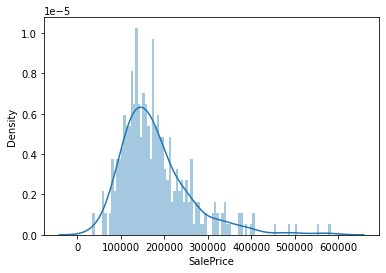

In [38]:
#Distribusi data
sns.distplot(df4['SalePrice'], bins=100)

<AxesSubplot:xlabel='SalePrice'>

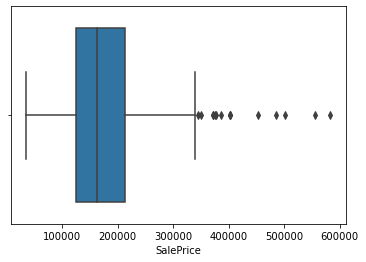

In [39]:
#Outlier
sns.boxplot(df4['SalePrice'])

### Tahun 2010

In [40]:
df5 = df[df['YrSold']==2010].reset_index()
df5

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
1,24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
2,26,27,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,134800
3,27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
4,33,34,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1438,1439,20,RM,90.0,7407,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,149700
171,1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
172,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
173,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [41]:
df5['SalePrice'].describe()

count       175.000000
mean     177393.674286
std       80451.280085
min       55000.000000
25%      128100.000000
50%      155000.000000
75%      213250.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [42]:
import math
    
def pemusatan_data(data):
    print('Modus dari' + ' ' + str(data) + ' :', df5[data].mode()[0])
    print('Median dari' + ' ' + str(data) + ' :', df5[data].median())
    print('Mean dari' + ' ' + str(data) + ' :', df5[data].mean())

In [43]:
#analisa pemusatan data kolom SalePrice tahun 2010
pemusatan_data('SalePrice')

Modus dari SalePrice : 128000
Median dari SalePrice : 155000.0
Mean dari SalePrice : 177393.67428571428


In [44]:
#analisa penyebaran data tahun 2010
penyebaran_data(df5, 'SalePrice')

Range dari SalePrice : 556657
Variance dari SalePrice : 6472408467.289852
Standard Deviation dari SalePrice : 80451.28008484298
Inter Quartile Range dari SalePrice : 85150.0


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

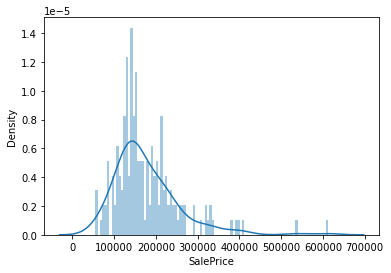

In [45]:
#Distribusi data
sns.distplot(df5['SalePrice'], bins=100)

<AxesSubplot:xlabel='SalePrice'>

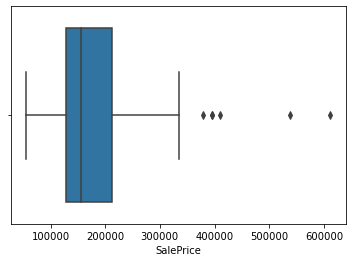

In [46]:
#Outlier
sns.boxplot(df5['SalePrice'])

# c. Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot dan jelaskan sebaiknya untuk analisis apakah lebih baik menggunakan mean atau menggunakan median sebagai ukuran pusat data? Berikan alasannya (Column Name: SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

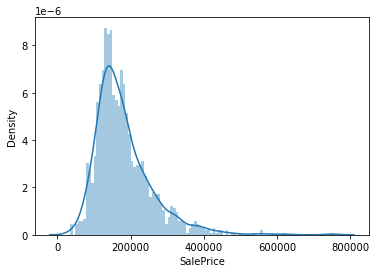

In [47]:
#Distribusi harga rumah
sns.distplot(df['SalePrice'], bins=100)

Untuk histogram dengan distribusi frekuensi data miring ke kanan (positively skewed) maka median digunakan sebagai ukuran pusat data. Nilai median pilihan yang paling baik pada distribusi data yang skew (mempunyai nilai outliers) karena nilai median robust terhadap outliers.
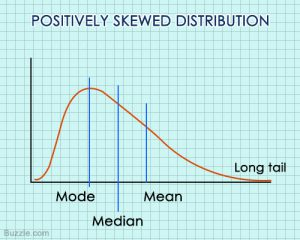

# d. Lakukan pengujian hipotesis untuk harga rumah (Kolom: SalePrice) untuk menguji apakah rata rata harga rumah pada tahun 2008 tidak berbeda dengan rata rata harga tahun 2009? (Kolom: YrSold) Tentukan apakah parametric/non-parametric testing yang diperlukan!

### Distribusi data rata-rata harga tahun 2008

In [48]:
harga_2008 = df[df['YrSold']==2008]
harga_2009 = df[df['YrSold']==2009]

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

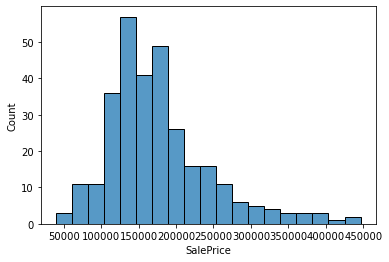

In [49]:
sns.histplot(data=harga_2008, x="SalePrice")

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

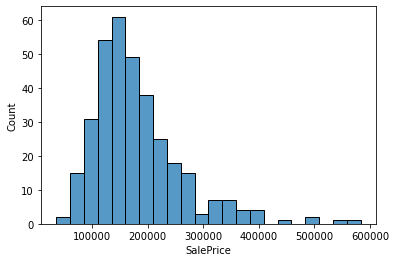

In [50]:
sns.histplot(data=harga_2009, x="SalePrice")

In [51]:
harga_2008['SalePrice'].mean()

177360.83881578947

In [52]:
harga_2009['SalePrice'].mean()

179432.10355029587

**Apakah parametrik atau non-parametrik? Karena kedua populasi tidak terdistribusi normal maka menggunakan non-parametrik**

###  Hypothesis Testing Statement

H0 : Rata-rata harga rumah tahun 2008 **sama** dengan rata-rata harga rumah tahun 2009

H1 : Rata-rata harga rumah tahun 2008 **tidak sama** rata-rata harga rumah tahun 2009

syarat H1 diterima atau H0 di tolak adalah ketika pvalue kurang dari 0.05 pvalue

#### Mencari P-Value

In [53]:
import scipy.stats as stats

In [54]:
t, pvalue = stats.mannwhitneyu(harga_2008['SalePrice'], harga_2009['SalePrice']) # Mann-Whitney U test
t

52167.5

In [55]:
stats.mannwhitneyu(harga_2008['SalePrice'], harga_2009['SalePrice'])

MannwhitneyuResult(statistic=52167.5, pvalue=0.736033655004268)

#### Menarik Kesimpulan

In [56]:
print(pvalue)
if pvalue >= 0.05:
    print('Tidak cukup bukti untuk menentang H0')
else:
    print('Cukup bukti untuk menentang H0')

0.736033655004268
Tidak cukup bukti untuk menentang H0


Sehingga rata-rata harga rumah tahun 2008 sama dengan rata-rata harga rumah tahun 2009